In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r"C:\Users\ADMIN\Downloads\baseball_players.csv")
data

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71
...,...,...,...,...,...,...
1029,Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08
1030,Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73
1031,Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19
1032,Randy_Keisler,STL,Relief_Pitcher,75,190.0,31.01


In [24]:
data.isnull().sum()

Name              0
Team              0
Position          0
Height(inches)    0
Weight(pounds)    1
Age               0
dtype: int64

In [25]:
data = data.dropna(axis = 0)

In [26]:
data.isnull().sum()

Name              0
Team              0
Position          0
Height(inches)    0
Weight(pounds)    0
Age               0
dtype: int64

In [27]:
data = data.drop(['Name', 'Team'], axis=1)

Text(0.5, 1.0, 'Count of Position')

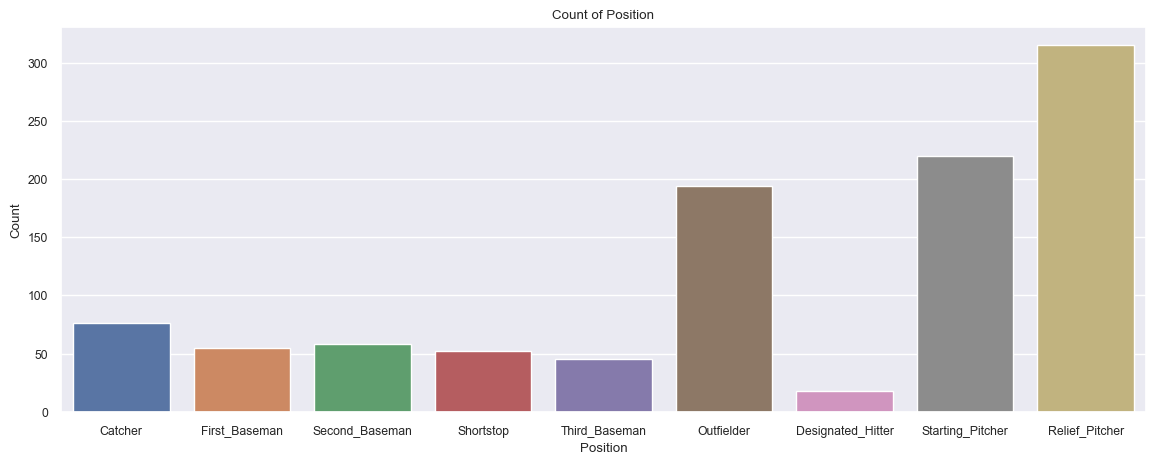

In [28]:
plt.figure(figsize=(14, 5))
sns.countplot(data = data, x = 'Position')
plt.xlabel("Position")
plt.ylabel("Count")
plt.title("Count of Position")

<AxesSubplot:xlabel='Position', ylabel='Height(inches)'>

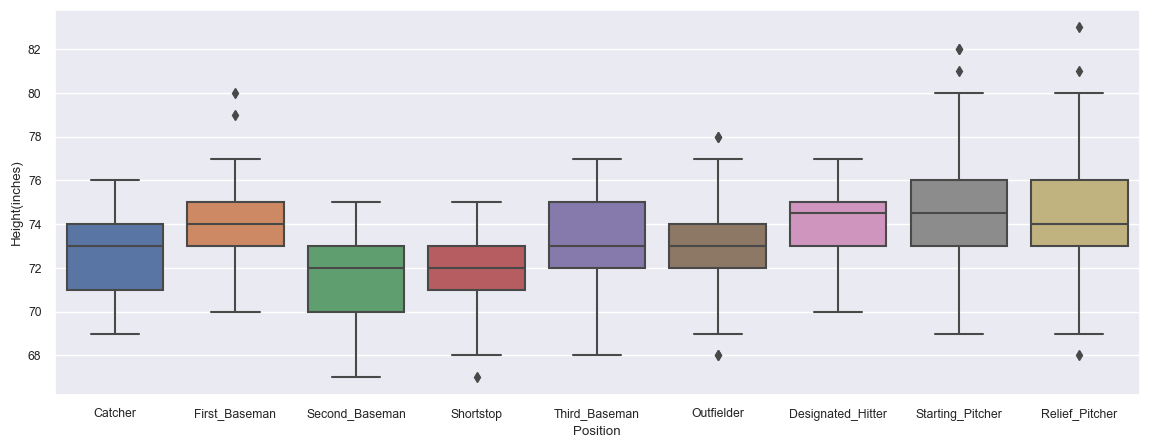

In [29]:
plt.figure(figsize=(14, 5))

sns.boxplot(x='Position',y='Height(inches)',data=data)

In [30]:
#sns.countplot(x='Position', data=data, palette = [sns.color_palette()[1]],order = data.Position.value_counts().index)
#plt.title("records per position");

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in data['Position']:
    data['Position'] = le.fit_transform(data['Position'])
    
# 문자를 숫자로 바꿔주는 코드

In [32]:
data.head()

,Position,Height(inches),Weight(pounds),Age
0,0,74,180.0,22.99
1,0,74,215.0,34.69
2,0,72,210.0,30.78
3,2,72,210.0,35.43
4,2,73,188.0,35.71


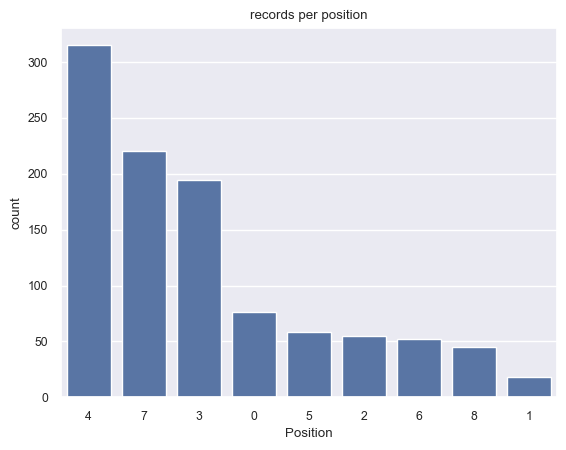

In [33]:
sns.countplot(x='Position', data=data, palette = [sns.color_palette()[0]],order = data.Position.value_counts().index)
plt.title("records per position");

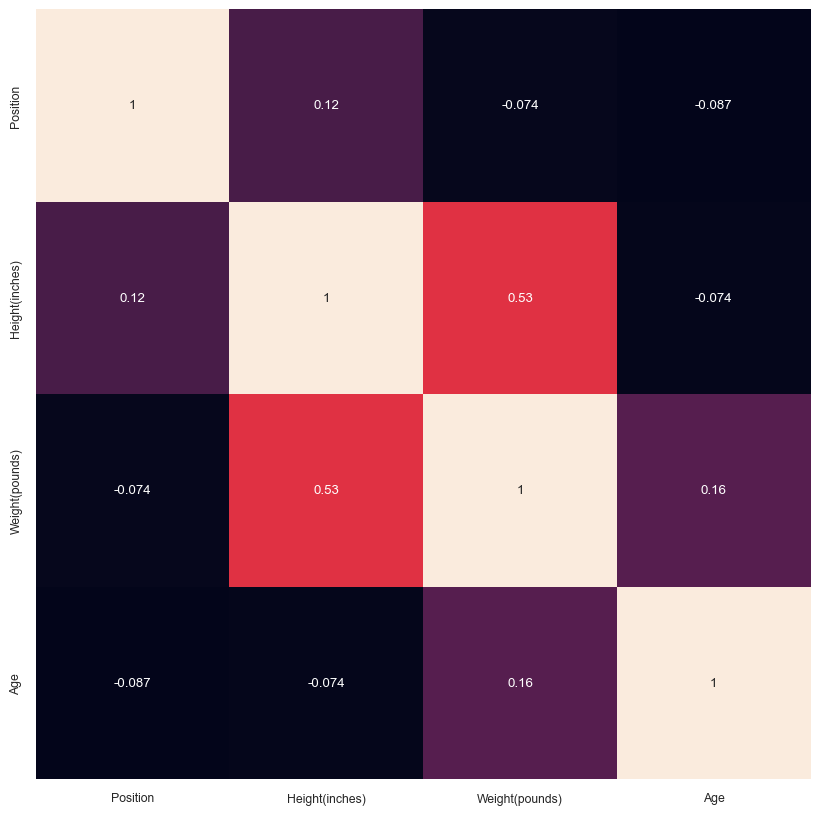

In [34]:
#상관 관계 행렬
df_data=data.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_data, annot=True, cbar=False)
plt.show()

In [35]:
X = data.drop('Position', axis = 1)

In [36]:
y = data['Position']

In [43]:
X

,Height(inches),Weight(pounds),Age
0,74,180.0,22.99
1,74,215.0,34.69
2,72,210.0,30.78
3,72,210.0,35.43
4,73,188.0,35.71
...,...,...,...
1029,73,190.0,25.08
1030,74,180.0,25.73
1031,75,205.0,25.19
1032,75,190.0,31.01


In [44]:
y

0       0
1       0
2       0
3       2
4       2
       ..
1029    4
1030    4
1031    4
1032    4
1033    4
Name: Position, Length: 1033, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train.values.ravel())
prediction = knn_model.predict(X_test)

z_scaled_accuracy = knn_model.score(X_test, y_test)

print(z_scaled_accuracy)

0.23552123552123552


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

SVM

In [45]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.29343629343629346
[[ 0  0  0  0 22  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0 40  0  0  0  0]
 [ 0  0  0  0 76  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0 14  0  0  0  0]
 [ 0  0  0  0 54  0  0  0  0]
 [ 0  0  0  0 16  0  0  0  0]]


Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

## Confusion Matrix
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))

0.28957528957528955
[[ 0  0  0  2 20  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0 17  1  0  0  0]
 [ 0  0  0  3 37  0  0  0  0]
 [ 0  0  1  3 72  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0]
 [ 0  0  0  2 12  0  0  0  0]
 [ 0  0  0  2 49  1  2  0  0]
 [ 0  0  0  0 16  0  0  0  0]]


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MLP

In [20]:
from sklearn.neural_network import MLPClassifier

clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

## Confusion Matrix
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))

0.2972972972972973
[[ 0  0  0  7 15  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0]
 [ 0  0  0  3 12  0  0  3  0]
 [ 0  0  0 11 27  0  0  2  0]
 [ 0  0  0 12 53  0  0 11  0]
 [ 0  0  0  5 13  0  0  0  0]
 [ 0  0  0  3 10  0  0  1  0]
 [ 0  0  0  7 34  0  0 13  0]
 [ 0  0  0  4 12  0  0  0  0]]


Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

## Confusion Matrix
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))

0.24324324324324326
[[ 2  0  1  8  5  0  0  2  4]
 [ 0  0  0  0  1  0  0  0  0]
 [ 0  0  0  7  3  1  2  5  0]
 [ 4  0  0  7 10  4  1 11  3]
 [ 0  1  2 14 34  3  2 19  1]
 [ 0  0  1  6  3  3  1  2  2]
 [ 0  0  0  2  6  1  2  2  1]
 [ 3  1  0  5 23  2  1 15  4]
 [ 2  0  0  7  1  2  2  2  0]]


Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)

## Confusion Matrix
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test, pred))

0.23552123552123552
[[ 1  0  3  6  7  1  0  1  3]
 [ 0  0  0  0  1  0  0  0  0]
 [ 0  0  2  6  2  1  0  7  0]
 [ 0  0  0 10 12  3  1 10  4]
 [ 3  0  3 10 31  5  1 22  1]
 [ 0  0  0  6  4  4  0  3  1]
 [ 0  0  0  1  6  1  2  3  1]
 [ 1  0  0  8 31  2  0 10  2]
 [ 0  0  0  6  3  0  2  4  1]]
